In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:\\Users\\student\\Desktop\\Machine learning\\week6\\Mall_Customers.csv")

In [4]:
X = np.array(dataset.loc[:,["Annual Income (k$)","Spending Score (1-100)"]]).reshape((200,2))

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])

In [7]:
model = KMeans(n_clusters=5, random_state=42)

In [8]:
model.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
y = model.predict(X_scaled)

In [96]:
centers = model.cluster_centers_

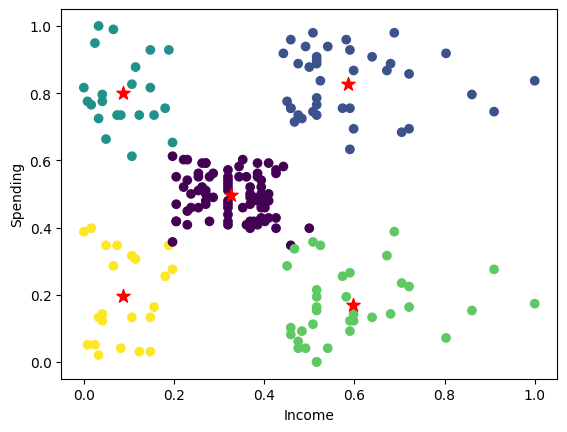

In [45]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c= y)
plt.scatter(centers[:,0],centers[:,1], c= 'red', marker= "*", s= 100)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.show()

Cluster 0:
	Xminimum =  0.1967		 Xmaximum =  0.5000
	Yminimum =  0.3469		 Ymaximum =  0.6122
Cluster 1:
	Xminimum =  0.4426		 Xmaximum =  1.0000
	Yminimum =  0.6327		 Ymaximum =  0.9796
Cluster 2:
	Xminimum =  0.0000		 Xmaximum =  0.1967
	Yminimum =  0.6122		 Ymaximum =  1.0000
Cluster 3:
	Xminimum =  0.4508		 Xmaximum =  1.0000
	Yminimum =  0.0000		 Ymaximum =  0.3878
Cluster 4:
	Xminimum =  0.0000		 Xmaximum =  0.1967
	Yminimum =  0.0204		 Ymaximum =  0.3980


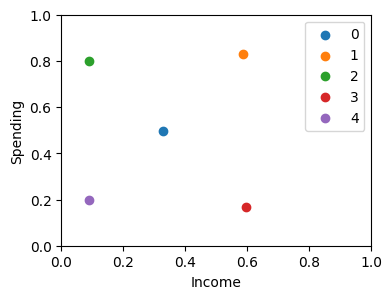

In [290]:
for i in range(5):
    print(f"Cluster {i}:\n\tXminimum = {X_scaled[y == i][:,0].min(): .4f}\t\t Xmaximum = {X_scaled[y == i][:,0].max(): .4f}")
    print(f"\tYminimum = {X_scaled[y == i][:,1].min(): .4f}\t\t Ymaximum = {X_scaled[y == i][:,1].max(): .4f}")

plt.figure(figsize=(4,3))
for i in range(5):
    plt.scatter(centers[i,0], centers[i,1], label = f"{i}")
    plt.legend()
plt.xlabel("Income")
plt.ylabel("Spending")
plt.axis((0,1,0,1))
plt.show()

In [ ]:
# VIP customer = 1
# Inactive customer = 4
# Balanced customer = 0
# saver customer = 3
# Spender customer = 2

In [272]:
new_data = np.array([85,85]).reshape((1,2))

In [273]:
scaled_new = scaler.transform(new_data)

In [275]:
cluster = model.predict(scaled_new)

In [276]:
if cluster[0] == 0:
    print("This is a Balanced Customer")
elif cluster[0] == 1:
    print("This is a VIP Customer")
elif cluster[0] == 2:
    print("This is a Spender Customer")
elif cluster[0] == 3:
    print("This is a Saver Customer")
else:
    print("This is a Inactive")

This is a VIP Customer


### Proof for correct cluster found

In [277]:
distances = []
for i in range(5):
    distances.append(np.sqrt(np.dot(centers[i]-scaled_new[0],centers[i]-scaled_new[0])))
centeroid = distances.index(min(distances))

In [287]:
centeroid

1

In [ ]:
# centeroid is 1 therefore cluster[0] equal to 1 and thus the "VIP customer" is printed